# 09 Introduction: Multidimensional (N-d) arrays, xarray, ERA5 climate reanalysis data

UW Geospatial Data Analysis  
CEE467/CEWA567  
David Shean  

## Introduction

This week we are going to do some basic analysis of climate reanalysis data. This could be useful for some of your projects, especially if considering time series data.

We will use a few different products from the state-of-the-art global ERA5 reanalysis, which currently span 1950-present with hourly timestep at up to a 9 km resolution.

We will use xarray to open, combine, analyze and plot the data.

## xarray

Take a moment to review this high-level introduction:
* http://xarray.pydata.org/en/stable/why-xarray.html

>"xarray (formerly xray) is an open source project and Python package that makes working with labelled multi-dimensional arrays simple, efficient, and fun!

>Xarray introduces **labels** in the form of dimensions, coordinates and attributes on top of raw NumPy-like arrays, which allows for a more intuitive, more concise, and less error-prone developer experience. The package includes a large and growing library of domain-agnostic functions for advanced analytics and visualization with these data structures.

>Xarray is inspired by and borrows heavily from pandas, the popular data analysis package focused on labelled tabular data. It is particularly tailored to working with netCDF files, which were the source of xarray’s data model, and integrates tightly with dask for parallel computing."

Remember back to Lab03, when you tried to extract a column of elevation values from a 2D NumPy array, with something like `myarray[:,4]`?  And then how much easier it was to do the same thing with a labeled pandas DataFrame `mydf['glas_z']`? Same deal here, just extended beyond 2D.

Why?
* Excellent choice for working with large datasets, as it uses lazy evaluation and parallel processing with Dask: http://xarray.pydata.org/en/stable/dask.html#
* Lots of great tutorials and resources: https://xarray.pydata.org/en/stable/tutorials-and-videos.html
* Big user community
* Some feel it should be the defacto Python data science object: https://xarray.pydata.org/en/stable/getting-started-guide/why-xarray.html#goals-and-aspirations

Why not?
* General means complicated
* Steep learning curve, esp for new users unfamiliar with Pandas
* Sometimes overkill for simple problems

## xarray data model overview
So, what's an nD array? (https://docs.scipy.org/doc/numpy-1.13.0/reference/arrays.ndarray.html)  You've been using them all quarter, but mostly 1D and 2D NumPy arrays.  

As with many of the packages we've covered this quarter, vocabulary can be one of the biggest blocks to learning.  Let's discuss.

![xarray image with labels](http://matthewrocklin.com/blog/images/xarray-boxes-2.png)
(http://xarray.pydata.org/en/latest/data-structures.html#dataset)

### Comparison with Pandas

Pandas is very good at handling 2D tabular datasets (e.g., csv with columns and rows, time series of met station variables from a single station [T, precip, etc]) or a single variable across multiple stations.  
* "If your data fits nicely into a pandas DataFrame then you’re better off using one of the more developed tools there." (https://xarray.pydata.org/en/latest/user-guide/plotting.html)
* https://xarray.pydata.org/en/stable/getting-started-guide/faq.html#should-i-use-xarray-instead-of-pandas
* "pandas excels at working with tabular data. That suffices for many statistical analyses, but physical scientists rely on N-dimensional arrays – which is where xarray comes in." (http://xarray.pydata.org/en/stable/why-xarray.html#goals-and-aspirations)

xarray extends the Pandas functionality to support 3+ dimensions (e.g., time series of 2D rasters).

#### xarray is to Pandas...

* xarray DataArray : Pandas DataSeries
* xarray DataSet : Pandas DataFrame

## Terminology
* https://xarray.pydata.org/en/stable/user-guide/terminology.html
* https://xarray.pydata.org/en/latest/user-guide/data-structures.html#data-structures

### DataArray
Four essential pieces:
* `values`: a numpy.ndarrays with actual data values (e.g., ('t2m', 'tp')
* `dims`: dimension names for each axis (e.g., ('lon', 'lat', 'time'))
* `coords`: a dict-like container of arrays (coordinates) that label each point (e.g., 1-dimensional arrays of numbers, datetime objects or strings)
* `attrs`: an OrderedDict containing additional metadata (attributes)

#### Why do we need both?
>"Dimensions provide names that xarray uses instead of the axis argument found in many numpy functions. Coordinates enable fast label based indexing and alignment, building on the functionality of the index found on a pandas DataFrame or Series."

### Dataset
* Essentially, a collection of DataArrays (like a dictionary of DataArrays)
* http://xarray.pydata.org/en/latest/data-structures.html#dataset

Notes:
* One value in one of the contained arrays (say a single temperature measurement) usually has multiple coordinates ('lon', 'lat', 'time')

### Useful xarray examples and references
* Indexing and selection: https://xarray.pydata.org/en/stable/user-guide/indexing.html
* Plotting: https://xarray.pydata.org/en/stable/user-guide/plotting.html
* Visualization examples: http://xarray.pydata.org/en/stable/examples/visualization_gallery.html
* Time-series analysis: https://xarray.pydata.org/en/stable/user-guide/time-series.html
* https://rabernat.github.io/research_computing/xarray.html

## netCDF format
Much of the xarray design and functionality is derived from the NetCDF project:

>"NetCDF (Network Common Data Form) is a set of software libraries and machine-independent data formats that support the creation, access, and sharing of array-oriented scientific data. It is also a community standard for sharing scientific data." [https://www.unidata.ucar.edu/software/netcdf/]

>"Data in netCDF format is:
>* Self-Describing. A netCDF file includes information about the data it contains.
>* Portable. A netCDF file can be accessed by computers with different ways of storing integers, characters, and floating-point numbers.
>* Scalable. Small subsets of large datasets in various formats may be accessed efficiently through netCDF interfaces, even from remote servers.
>* Appendable. Data may be appended to a properly structured netCDF file without copying the dataset or redefining its structure.
>* Sharable. One writer and multiple readers may simultaneously access the same netCDF file.
>* Archivable. Access to all earlier forms of netCDF data will be supported by current and future versions of the software."


>"Commonly used in climatology, meteorology and oceanography applications (e.g., weather forecasting, climate change) and GIS applications." [https://en.wikipedia.org/wiki/NetCDF]

In [ ]:
import xarray as xr
import os
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Demo: Create simple DataArray
* From https://xarray.pydata.org/en/latest/user-guide/data-structures.html#data-structures

In [ ]:
data = np.random.rand(4, 3)
data

array([[0.59930315, 0.31652312, 0.17450757],
       [0.78045485, 0.08850642, 0.93117557],
       [0.40051498, 0.10657858, 0.60082638],
       [0.53881418, 0.055851  , 0.45250818]])

In [ ]:
#xr.DataArray?

In [ ]:
xr.DataArray(data)

<xarray.DataArray (dim_0: 4, dim_1: 3)>
array([[0.59930315, 0.31652312, 0.17450757],
       [0.78045485, 0.08850642, 0.93117557],
       [0.40051498, 0.10657858, 0.60082638],
       [0.53881418, 0.055851  , 0.45250818]])
Dimensions without coordinates: dim_0, dim_1

In [ ]:
locs = ["WA", "OR", "CA"]

In [ ]:
times = pd.date_range("2000-01-01", periods=4)
times

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04'], dtype='datetime64[ns]', freq='D')

In [ ]:
foo = xr.DataArray(data, coords=[times, locs], dims=["time", "space"])

In [ ]:
foo

<xarray.DataArray (time: 4, space: 3)>
array([[0.59930315, 0.31652312, 0.17450757],
       [0.78045485, 0.08850642, 0.93117557],
       [0.40051498, 0.10657858, 0.60082638],
       [0.53881418, 0.055851  , 0.45250818]])
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 2000-01-04
  * space    (space) <U2 'WA' 'OR' 'CA'

### Indexing

In [ ]:
foo[0, :]

<xarray.DataArray (space: 3)>
array([0.59930315, 0.31652312, 0.17450757])
Coordinates:
    time     datetime64[ns] 2000-01-01
  * space    (space) <U2 'WA' 'OR' 'CA'

In [ ]:
foo.loc['2000-01-03']

<xarray.DataArray (space: 3)>
array([0.40051498, 0.10657858, 0.60082638])
Coordinates:
    time     datetime64[ns] 2000-01-03
  * space    (space) <U2 'WA' 'OR' 'CA'

In [ ]:
#foo.loc['WA', '2000-01-03']

In [ ]:
foo.sel(time='2000-01-03', space='OR')

<xarray.DataArray ()>
array(0.10657858)
Coordinates:
    time     datetime64[ns] 2000-01-03
    space    <U2 'OR'

In [ ]:
foo.sel(space='OR', time='2000-01-03')

<xarray.DataArray ()>
array(0.10657858)
Coordinates:
    time     datetime64[ns] 2000-01-03
    space    <U2 'OR'

In [ ]:
foo.isel(time=3)

## Demo: Create xarray DataSet from SNOTEL data

In [ ]:
snotel_datadir = '../08_Vector_TimeSeries_SNOTEL'

In [ ]:
sites_fn = os.path.join(snotel_datadir, 'snotel_conus_sites.json')
#singlesite_pkl_fn = 'SNOTEL-SNWD_D_679_WA_SNTL.pkl'
allsites_SNWD_pkl_fn = os.path.join(snotel_datadir, 'SNOTEL-SNWD_D_CONUS_all.pkl')
allsites_WTEQ_pkl_fn = os.path.join(snotel_datadir, 'SNOTEL-WTEQ_D_CONUS_all.pkl')

In [ ]:
sites_gdf_all = gpd.read_file(sites_fn).set_index('index')
allsites_snwd_df = pd.read_pickle(allsites_SNWD_pkl_fn).dropna(axis=0, how='all')
allsites_wteq_df = pd.read_pickle(allsites_WTEQ_pkl_fn).dropna(axis=0, how='all')

In [ ]:
sites_gdf_all

,code,name,network,elevation_m,site_property,geometry
index,,,,,,
SNOTEL:301_CA_SNTL,301_CA_SNTL,Adin Mtn,SNOTEL,1886.712036,"{'county': 'Modoc', 'state': 'California', 'si...",POINT (-120.79192 41.23583)
SNOTEL:907_UT_SNTL,907_UT_SNTL,Agua Canyon,SNOTEL,2712.719971,"{'county': 'Kane', 'state': 'Utah', 'site_comm...",POINT (-112.27118 37.52217)
SNOTEL:916_MT_SNTL,916_MT_SNTL,Albro Lake,SNOTEL,2529.840088,"{'county': 'Madison', 'state': 'Montana', 'sit...",POINT (-111.95902 45.59723)
SNOTEL:908_WA_SNTL,908_WA_SNTL,Alpine Meadows,SNOTEL,1066.800049,"{'county': 'King', 'state': 'Washington', 'sit...",POINT (-121.69847 47.77957)
SNOTEL:302_OR_SNTL,302_OR_SNTL,Aneroid Lake #2,SNOTEL,2255.520020,"{'county': 'Wallowa', 'state': 'Oregon', 'site...",POINT (-117.19258 45.21328)
...,...,...,...,...,...,...
SNOTEL:877_AZ_SNTL,877_AZ_SNTL,Workman Creek,SNOTEL,2103.120117,"{'county': 'Gila', 'state': 'Arizona', 'site_c...",POINT (-110.91773 33.81242)
SNOTEL:1228_UT_SNTL,1228_UT_SNTL,Wrigley Creek,SNOTEL,2842.869629,"{'county': 'Sanpete', 'state': 'Utah', 'site_c...",POINT (-111.35685 39.13233)
SNOTEL:1197_UT_SNTL,1197_UT_SNTL,Yankee Reservoir,SNOTEL,2649.321533,"{'county': 'Iron', 'state': 'Utah', 'site_comm...",POINT (-112.77495 37.74797)


In [ ]:
allsites_snwd_df

,SNOTEL:301_CA_SNTL,SNOTEL:907_UT_SNTL,SNOTEL:916_MT_SNTL,SNOTEL:908_WA_SNTL,SNOTEL:302_OR_SNTL,SNOTEL:1000_OR_SNTL,SNOTEL:303_CO_SNTL,SNOTEL:1030_CO_SNTL,SNOTEL:304_OR_SNTL,SNOTEL:306_ID_SNTL,...,SNOTEL:872_WY_SNTL,SNOTEL:873_OR_SNTL,SNOTEL:874_CO_SNTL,SNOTEL:875_WY_SNTL,SNOTEL:876_MT_SNTL,SNOTEL:877_AZ_SNTL,SNOTEL:1228_UT_SNTL,SNOTEL:1197_UT_SNTL,SNOTEL:878_WY_SNTL,SNOTEL:1033_CO_SNTL
datetime,,,,,,,,,,,,,,,,,,,,,
1984-10-01 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1984-10-02 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1984-10-03 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1984-10-04 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1984-10-13 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-16 00:00:00+00:00,28.0,18.0,40.0,68.0,33.0,53.0,14.0,54.0,36.0,59.0,...,18.0,38.0,73.0,31.0,24.0,0.0,23.0,15.0,25.0,52.0
2022-02-17 00:00:00+00:00,27.0,18.0,44.0,70.0,35.0,52.0,16.0,59.0,36.0,59.0,...,NaN,38.0,75.0,30.0,26.0,NaN,24.0,20.0,30.0,58.0
2022-02-18 00:00:00+00:00,27.0,18.0,44.0,69.0,35.0,52.0,15.0,57.0,37.0,58.0,...,23.0,38.0,77.0,30.0,25.0,0.0,24.0,18.0,30.0,56.0


In [ ]:
allsites_wteq_df

,SNOTEL:301_CA_SNTL,SNOTEL:907_UT_SNTL,SNOTEL:916_MT_SNTL,SNOTEL:908_WA_SNTL,SNOTEL:302_OR_SNTL,SNOTEL:1000_OR_SNTL,SNOTEL:303_CO_SNTL,SNOTEL:1030_CO_SNTL,SNOTEL:304_OR_SNTL,SNOTEL:305_CO_SNTL,...,SNOTEL:872_WY_SNTL,SNOTEL:873_OR_SNTL,SNOTEL:874_CO_SNTL,SNOTEL:875_WY_SNTL,SNOTEL:876_MT_SNTL,SNOTEL:877_AZ_SNTL,SNOTEL:1228_UT_SNTL,SNOTEL:1197_UT_SNTL,SNOTEL:878_WY_SNTL,SNOTEL:1033_CO_SNTL
datetime,,,,,,,,,,,,,,,,,,,,,
1963-10-01 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1963-10-02 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1963-10-03 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1963-10-04 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1963-10-05 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-23 00:00:00+00:00,9.7,6.5,12.3,36.2,10.4,17.0,4.8,16.0,12.5,NaN,...,4.2,6.0,27.9,8.6,7.1,NaN,7.2,5.9,10.7,19.3
2022-02-24 00:00:00+00:00,9.8,6.8,12.4,36.3,10.4,17.0,5.0,16.4,12.5,NaN,...,4.4,6.0,29.4,8.7,7.3,0.8,7.2,6.1,10.9,19.6
2022-02-25 00:00:00+00:00,9.8,6.8,12.5,36.5,10.4,17.0,4.9,16.4,12.6,NaN,...,4.6,6.0,29.6,8.7,7.3,0.7,7.2,6.1,11.1,19.6


In [ ]:
allsites_wteq_df.dropna(how='all', axis=1)

,SNOTEL:301_CA_SNTL,SNOTEL:907_UT_SNTL,SNOTEL:916_MT_SNTL,SNOTEL:908_WA_SNTL,SNOTEL:302_OR_SNTL,SNOTEL:1000_OR_SNTL,SNOTEL:303_CO_SNTL,SNOTEL:1030_CO_SNTL,SNOTEL:304_OR_SNTL,SNOTEL:305_CO_SNTL,...,SNOTEL:872_WY_SNTL,SNOTEL:873_OR_SNTL,SNOTEL:874_CO_SNTL,SNOTEL:875_WY_SNTL,SNOTEL:876_MT_SNTL,SNOTEL:877_AZ_SNTL,SNOTEL:1228_UT_SNTL,SNOTEL:1197_UT_SNTL,SNOTEL:878_WY_SNTL,SNOTEL:1033_CO_SNTL
datetime,,,,,,,,,,,,,,,,,,,,,
1963-10-01 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1963-10-02 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1963-10-03 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1963-10-04 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1963-10-05 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-23 00:00:00+00:00,9.7,6.5,12.3,36.2,10.4,17.0,4.8,16.0,12.5,NaN,...,4.2,6.0,27.9,8.6,7.1,NaN,7.2,5.9,10.7,19.3
2022-02-24 00:00:00+00:00,9.8,6.8,12.4,36.3,10.4,17.0,5.0,16.4,12.5,NaN,...,4.4,6.0,29.4,8.7,7.3,0.8,7.2,6.1,10.9,19.6
2022-02-25 00:00:00+00:00,9.8,6.8,12.5,36.5,10.4,17.0,4.9,16.4,12.6,NaN,...,4.6,6.0,29.6,8.7,7.3,0.7,7.2,6.1,11.1,19.6


In [ ]:
#allsites_snwd_df.to_xarray()

###  Note difference in number of records and columns
* Some stations have one but not the other
* WTEQ extends farther back in time

In [ ]:
def get_DataArray(df, sites, name="SNWD_D"):
    valid_sites = sites.loc[df.columns]
    
    site_id = valid_sites.index.values
    lon = valid_sites.geometry.x.values
    lat = valid_sites.geometry.y.values
    elev = valid_sites.elevation_m.values
    site_name = valid_sites.name.values
    
    #da = xr.DataArray(df, dims=("time", "site_id"), name=name)
    da = xr.DataArray(df, dims=("time", "site_id"), coords=(df.index.values, site_id), name=name)
    #For some reason, the times are not read as datetime64 objects, so reassign
    da["time"] = df.index.values
    da = da.assign_coords(lon=("site_id", lon), lat=("site_id", lat), elev=("site_id", elev))
    return da

In [ ]:
#sites_gdf_all.to_xarray()

In [ ]:
snwd_da = get_DataArray(allsites_snwd_df, sites_gdf_all, name="SNWD_D")

In [ ]:
snwd_da

<xarray.DataArray 'SNWD_D' (time: 10439, site_id: 805)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [27., 18., 44., ..., 18., 30., 56.],
       [26., 19., 43., ..., 18., 30., 57.],
       [25., 18., 43., ..., 17., 30., 55.]])
Coordinates:
  * time     (time) datetime64[ns] 1984-10-01 1984-10-02 ... 2022-02-20
  * site_id  (site_id) object 'Adin Mtn' 'Agua Canyon' ... 'Zirkel'
    lon      (site_id) float64 -120.8 -112.3 -112.0 ... -112.8 -109.8 -106.6
    lat      (site_id) float64 41.24 37.52 45.6 47.78 ... 37.75 43.93 40.79
    elev     (site_id) float64 1.887e+03 2.713e+03 ... 2.545e+03 2.847e+03

In [ ]:
snwd_da.attrs['description'] = 'SNOTEL snow depth measurements'

In [ ]:
snwd_da.attrs['units'] = 'inches'

In [ ]:
snwd_da

<xarray.DataArray 'SNWD_D' (time: 10439, site_id: 805)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [27., 18., 44., ..., 18., 30., 56.],
       [26., 19., 43., ..., 18., 30., 57.],
       [25., 18., 43., ..., 17., 30., 55.]])
Coordinates:
  * time     (time) datetime64[ns] 1984-10-01 1984-10-02 ... 2022-02-20
  * site_id  (site_id) object 'SNOTEL:301_CA_SNTL' ... 'SNOTEL:1033_CO_SNTL'
    lon      (site_id) float64 -120.8 -112.3 -112.0 ... -112.8 -109.8 -106.6
    lat      (site_id) float64 41.24 37.52 45.6 47.78 ... 37.75 43.93 40.79
    elev     (site_id) float64 1.887e+03 2.713e+03 ... 2.545e+03 2.847e+03
Attributes:
    description:  SNOTEL snow depth measurements
    units:        inches

In [ ]:
wteq_da = get_DataArray(allsites_wteq_df, sites_gdf_all, name="WTEQ_D")

In [ ]:
wteq_da

<xarray.DataArray 'WTEQ_D' (time: 21335, site_id: 796)>
array([[ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       ...,
       [ 9.8,  6.8, 12.5, ...,  6.1, 11.1, 19.6],
       [ 9.9,  6.7, 12.5, ...,  5.9, 11. , 19.7],
       [ 9.9,  6.7, 12.6, ...,  6.1, 11.1, 19.6]])
Coordinates:
  * time     (time) datetime64[ns] 1963-10-01 1963-10-02 ... 2022-02-27
  * site_id  (site_id) object 'SNOTEL:301_CA_SNTL' ... 'SNOTEL:1033_CO_SNTL'
    lon      (site_id) float64 -120.8 -112.3 -112.0 ... -112.8 -109.8 -106.6
    lat      (site_id) float64 41.24 37.52 45.6 47.78 ... 37.75 43.93 40.79
    elev     (site_id) float64 1.887e+03 2.713e+03 ... 2.545e+03 2.847e+03

In [ ]:
wteq_da.attrs['units'] = 'inches w.e.'
wteq_da.attrs['description'] = 'SNOTEL snow water equivalent measurements'

In [ ]:
wteq_da

<xarray.DataArray 'WTEQ_D' (time: 21335, site_id: 796)>
array([[ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       ...,
       [ 9.8,  6.8, 12.5, ...,  6.1, 11.1, 19.6],
       [ 9.9,  6.7, 12.5, ...,  5.9, 11. , 19.7],
       [ 9.9,  6.7, 12.6, ...,  6.1, 11.1, 19.6]])
Coordinates:
  * time     (time) datetime64[ns] 1963-10-01 1963-10-02 ... 2022-02-27
  * site_id  (site_id) object 'SNOTEL:301_CA_SNTL' ... 'SNOTEL:1033_CO_SNTL'
    lon      (site_id) float64 -120.8 -112.3 -112.0 ... -112.8 -109.8 -106.6
    lat      (site_id) float64 41.24 37.52 45.6 47.78 ... 37.75 43.93 40.79
    elev     (site_id) float64 1.887e+03 2.713e+03 ... 2.545e+03 2.847e+03
Attributes:
    units:        inches w.e.
    description:  SNOTEL snow water equivalent measurements

### Merge the two DataArrays into a single DataSet

In [ ]:
ds = xr.merge([snwd_da, wteq_da])

In [ ]:
ds

<xarray.Dataset>
Dimensions:  (time: 21335, site_id: 808)
Coordinates:
  * time     (time) datetime64[ns] 1963-10-01 1963-10-02 ... 2022-02-27
  * site_id  (site_id) object 'SNOTEL:1000_OR_SNTL' ... 'SNOTEL:999_WA_SNTL'
    lon      (site_id) float64 -122.2 -105.4 -116.9 ... -110.8 -121.4 -121.7
    lat      (site_id) float64 42.87 37.61 40.36 46.91 ... 40.89 48.86 48.76
    elev     (site_id) float64 1.832e+03 3.246e+03 ... 1.606e+03 1.073e+03
Data variables:
    SNWD_D   (time, site_id) float64 nan nan nan nan nan ... nan nan nan nan nan
    WTEQ_D   (time, site_id) float64 nan nan nan nan nan ... nan 6.8 75.0 40.6
Attributes:
    description:  SNOTEL snow depth measurements
    units:        inches

In [ ]:
ds.attrs = {}

In [ ]:
ds

<xarray.Dataset>
Dimensions:  (time: 21335, site_id: 808)
Coordinates:
  * time     (time) datetime64[ns] 1963-10-01 1963-10-02 ... 2022-02-27
  * site_id  (site_id) object 'SNOTEL:1000_OR_SNTL' ... 'SNOTEL:999_WA_SNTL'
    lon      (site_id) float64 -122.2 -105.4 -116.9 ... -110.8 -121.4 -121.7
    lat      (site_id) float64 42.87 37.61 40.36 46.91 ... 40.89 48.86 48.76
    elev     (site_id) float64 1.832e+03 3.246e+03 ... 1.606e+03 1.073e+03
Data variables:
    SNWD_D   (time, site_id) float64 nan nan nan nan nan ... nan nan nan nan nan
    WTEQ_D   (time, site_id) float64 nan nan nan nan nan ... nan 6.8 75.0 40.6

### Write out as NetCDF file
* Better than random pickle file

In [ ]:
out_fn = os.path.join(snotel_datadir, 'SNOTEL_CONUS_all.nc')

In [ ]:
#ds.to_netcdf?

In [ ]:
ds.to_netcdf(out_fn)

In [ ]:
reopened = xr.open_dataset(out_fn)

In [ ]:
reopened

<xarray.Dataset>
Dimensions:  (time: 21335, site_id: 808)
Coordinates:
  * time     (time) datetime64[ns] 1963-10-01 1963-10-02 ... 2022-02-27
  * site_id  (site_id) object 'SNOTEL:1000_OR_SNTL' ... 'SNOTEL:999_WA_SNTL'
    lon      (site_id) float64 ...
    lat      (site_id) float64 ...
    elev     (site_id) float64 ...
Data variables:
    SNWD_D   (time, site_id) float64 ...
    WTEQ_D   (time, site_id) float64 ...

## Isolate one site

In [ ]:
sitecode = 'SNOTEL:679_WA_SNTL'

In [ ]:
ds.sel(site_id=sitecode)

<xarray.Dataset>
Dimensions:  (time: 21335)
Coordinates:
  * time     (time) datetime64[ns] 1963-10-01 1963-10-02 ... 2022-02-27
    site_id  <U18 'SNOTEL:679_WA_SNTL'
    lon      float64 -121.7
    lat      float64 46.78
    elev     float64 1.564e+03
Data variables:
    SNWD_D   (time) float64 nan nan nan nan nan nan ... nan nan nan nan nan nan
    WTEQ_D   (time) float64 nan nan nan nan nan nan ... 51.1 51.2 51.3 51.4 52.0

In [ ]:
#Doesn't work
#ds.sel(site_id=sitecode).plot()

In [ ]:
ds.sel(site_id=sitecode).WTEQ_D

<xarray.DataArray 'WTEQ_D' (time: 21335)>
array([ nan,  nan,  nan, ..., 51.3, 51.4, 52. ])
Coordinates:
  * time     (time) datetime64[ns] 1963-10-01 1963-10-02 ... 2022-02-27
    site_id  <U18 'SNOTEL:679_WA_SNTL'
    lon      float64 -121.7
    lat      float64 46.78
    elev     float64 1.564e+03
Attributes:
    units:        inches w.e.
    description:  SNOTEL snow water equivalent measurements

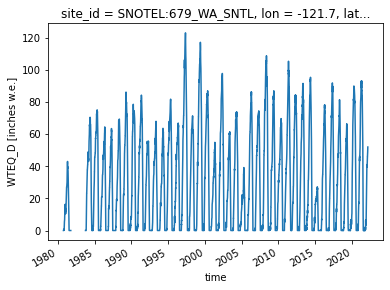

In [ ]:
ds.sel(site_id=sitecode).WTEQ_D.plot();

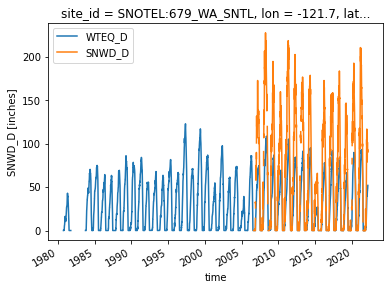

In [ ]:
f, ax = plt.subplots()
ds.sel(site_id=sitecode).WTEQ_D.plot(ax=ax, label='WTEQ_D')
ds.sel(site_id=sitecode).SNWD_D.plot(ax=ax, label='SNWD_D')
ax.legend();

In [ ]:
#Remember we used hvplot for pandas
#import hvplot.pandas

In [ ]:
import hvplot.xarray

In [ ]:
ds.sel(site_id=sitecode).hvplot()

:NdOverlay   [Variable]
   :Curve   [time]   (value)

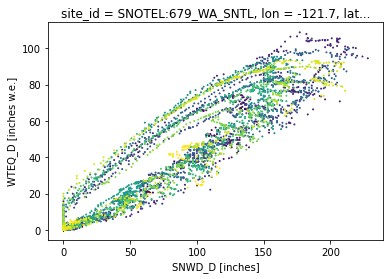

In [ ]:
ds.sel(site_id=sitecode).plot.scatter(x="SNWD_D", y="WTEQ_D", s=1, c=ds.isel(site_id=0)['time'])

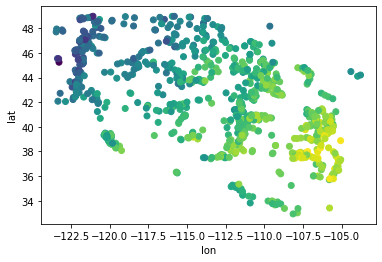

In [ ]:
ds.plot.scatter(x="lon", y="lat", c=ds["elev"])